## Import all needed library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('auto_imports.csv')

In [3]:
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Basic Check

In [4]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## here you see they do not provide the columns name. So we will assign the column names

In [5]:
column_names = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_of_doors", "body_style", "drive_wheels", "engine-location", "wheel_base",
    "length", "width", "height", "curb_weight", "engine_type", "num_of_cylinders",
    "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
    "horsepower", "peak_rpm", "cit_-mpg", "highway_mpg", "price"
]

df.columns = column_names


In [6]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine-location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'cit_-mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [7]:
df["price"]

0      16500
1      16500
2      13950
3      17450
4      15250
       ...  
195    16845
196    19045
197    21485
198    22470
199    22625
Name: price, Length: 200, dtype: int64

In [8]:
df.shape

(200, 26)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

## Insight
__Basic Insights Based on Data Types__
 Object columns (15 total) likely contain categorical or mixed data:

Examples: 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'horsepower', etc.

Some of these (like horsepower, bore, stroke, peak-rpm, and normalized-losses) should be numeric but are stored as object, indicating missing values or bad formatting (e.g., '?').

Numeric columns (11 total):

Includes continuous variables like 'wheel-base', 'length', 'curb-weight', 'price'.

These can be used for statistical summaries and visualizations.
   


In [10]:
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine-location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
cit_-mpg             0
highway_mpg          0
price                0
dtype: int64

### Not null values

# Statistical Dataset

In [11]:
df.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,cit_-mpg,highway_mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


# Insight
1.__Price Range is Extremely Wide__

Min price: $5,118

Max price: $45,400

Mean price: $13,205

 Insight: There's a massive spread in car prices, suggesting a dataset that includes both economy and luxury vehicles. A price difference of over $40,000 implies significant variance in features, performance, and brands.

2.__Engine Size and Curb Weight Are Strongly Correlated Candidates__

Engine size mean: 126.86 | max: 326

Curb weight mean: 2,555 lbs | max: 4,066 lbs

 Insight: Heavier vehicles generally have larger engines. Plotting these could show clusters by car type (compact vs SUV/luxury).

3.__Compression Ratio Varies Widely__

Range: 7.0 – 23.0

 Insight: This suggests a mix of performance-tuned and standard engines, hinting at different levels of fuel efficiency and power output.

 Fuel Efficiency Spread Indicates Use-Case Diversity
City MPG: 13 – 49

Highway MPG: 16 – 54

 Insight: Vehicles range from fuel-hungry sports/luxury cars to highly efficient compact cars.

4.__Size Distribution Reflects Multiple Vehicle Classes__

Length: 141.1 – 208.1 inches

Wheelbase: 86.6 – 120.9 inches

 Insight: The wide range in dimensions implies the dataset spans multiple classes: from compact hatchbacks to large sedans/SUVs.

# Missing imputation

In [12]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine-location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'cit_-mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop_duplicates()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine-location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,cit_-mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [15]:
df["normalized_losses"]

0        ?
1        ?
2      164
3      164
4        ?
      ... 
195     95
196     95
197     95
198     95
199     95
Name: normalized_losses, Length: 200, dtype: object

In [16]:
df.replace('?', np.nan, inplace=True)

In [17]:
df["normalized_losses"].isnull().sum()
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine-location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,cit_-mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [18]:
for col in ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [19]:
df.isnull().sum()

symboling             0
normalized_losses    36
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine-location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
cit_-mpg              0
highway_mpg           0
price                 0
dtype: int64

## replace the missing value with mean


In [20]:
cols_to_convert = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm']
for col in cols_to_convert:
    df[col].fillna(df[col].mean(), inplace=True)

In [21]:
df["price"]

0      16500
1      16500
2      13950
3      17450
4      15250
       ...  
195    16845
196    19045
197    21485
198    22470
199    22625
Name: price, Length: 200, dtype: int64

In [22]:
print(df[cols_to_convert].isnull().sum())

normalized_losses    0
bore                 0
stroke               0
horsepower           0
peak_rpm             0
dtype: int64


In [23]:
df.num_of_doors.value_counts()

num_of_doors
four    113
two      85
Name: count, dtype: int64

In [24]:
# Fill missing values with the mode (most frequent value)
df['num_of_doors'] = df['num_of_doors'].fillna(df['num_of_doors'].mode()[0])


In [25]:
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine-location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
cit_-mpg             0
highway_mpg          0
price                0
dtype: int64

# Perform Eda(Exploratory Data Analysis )
> univariant Analysis

> Bivariant Analysis

> Multivariant Analysis

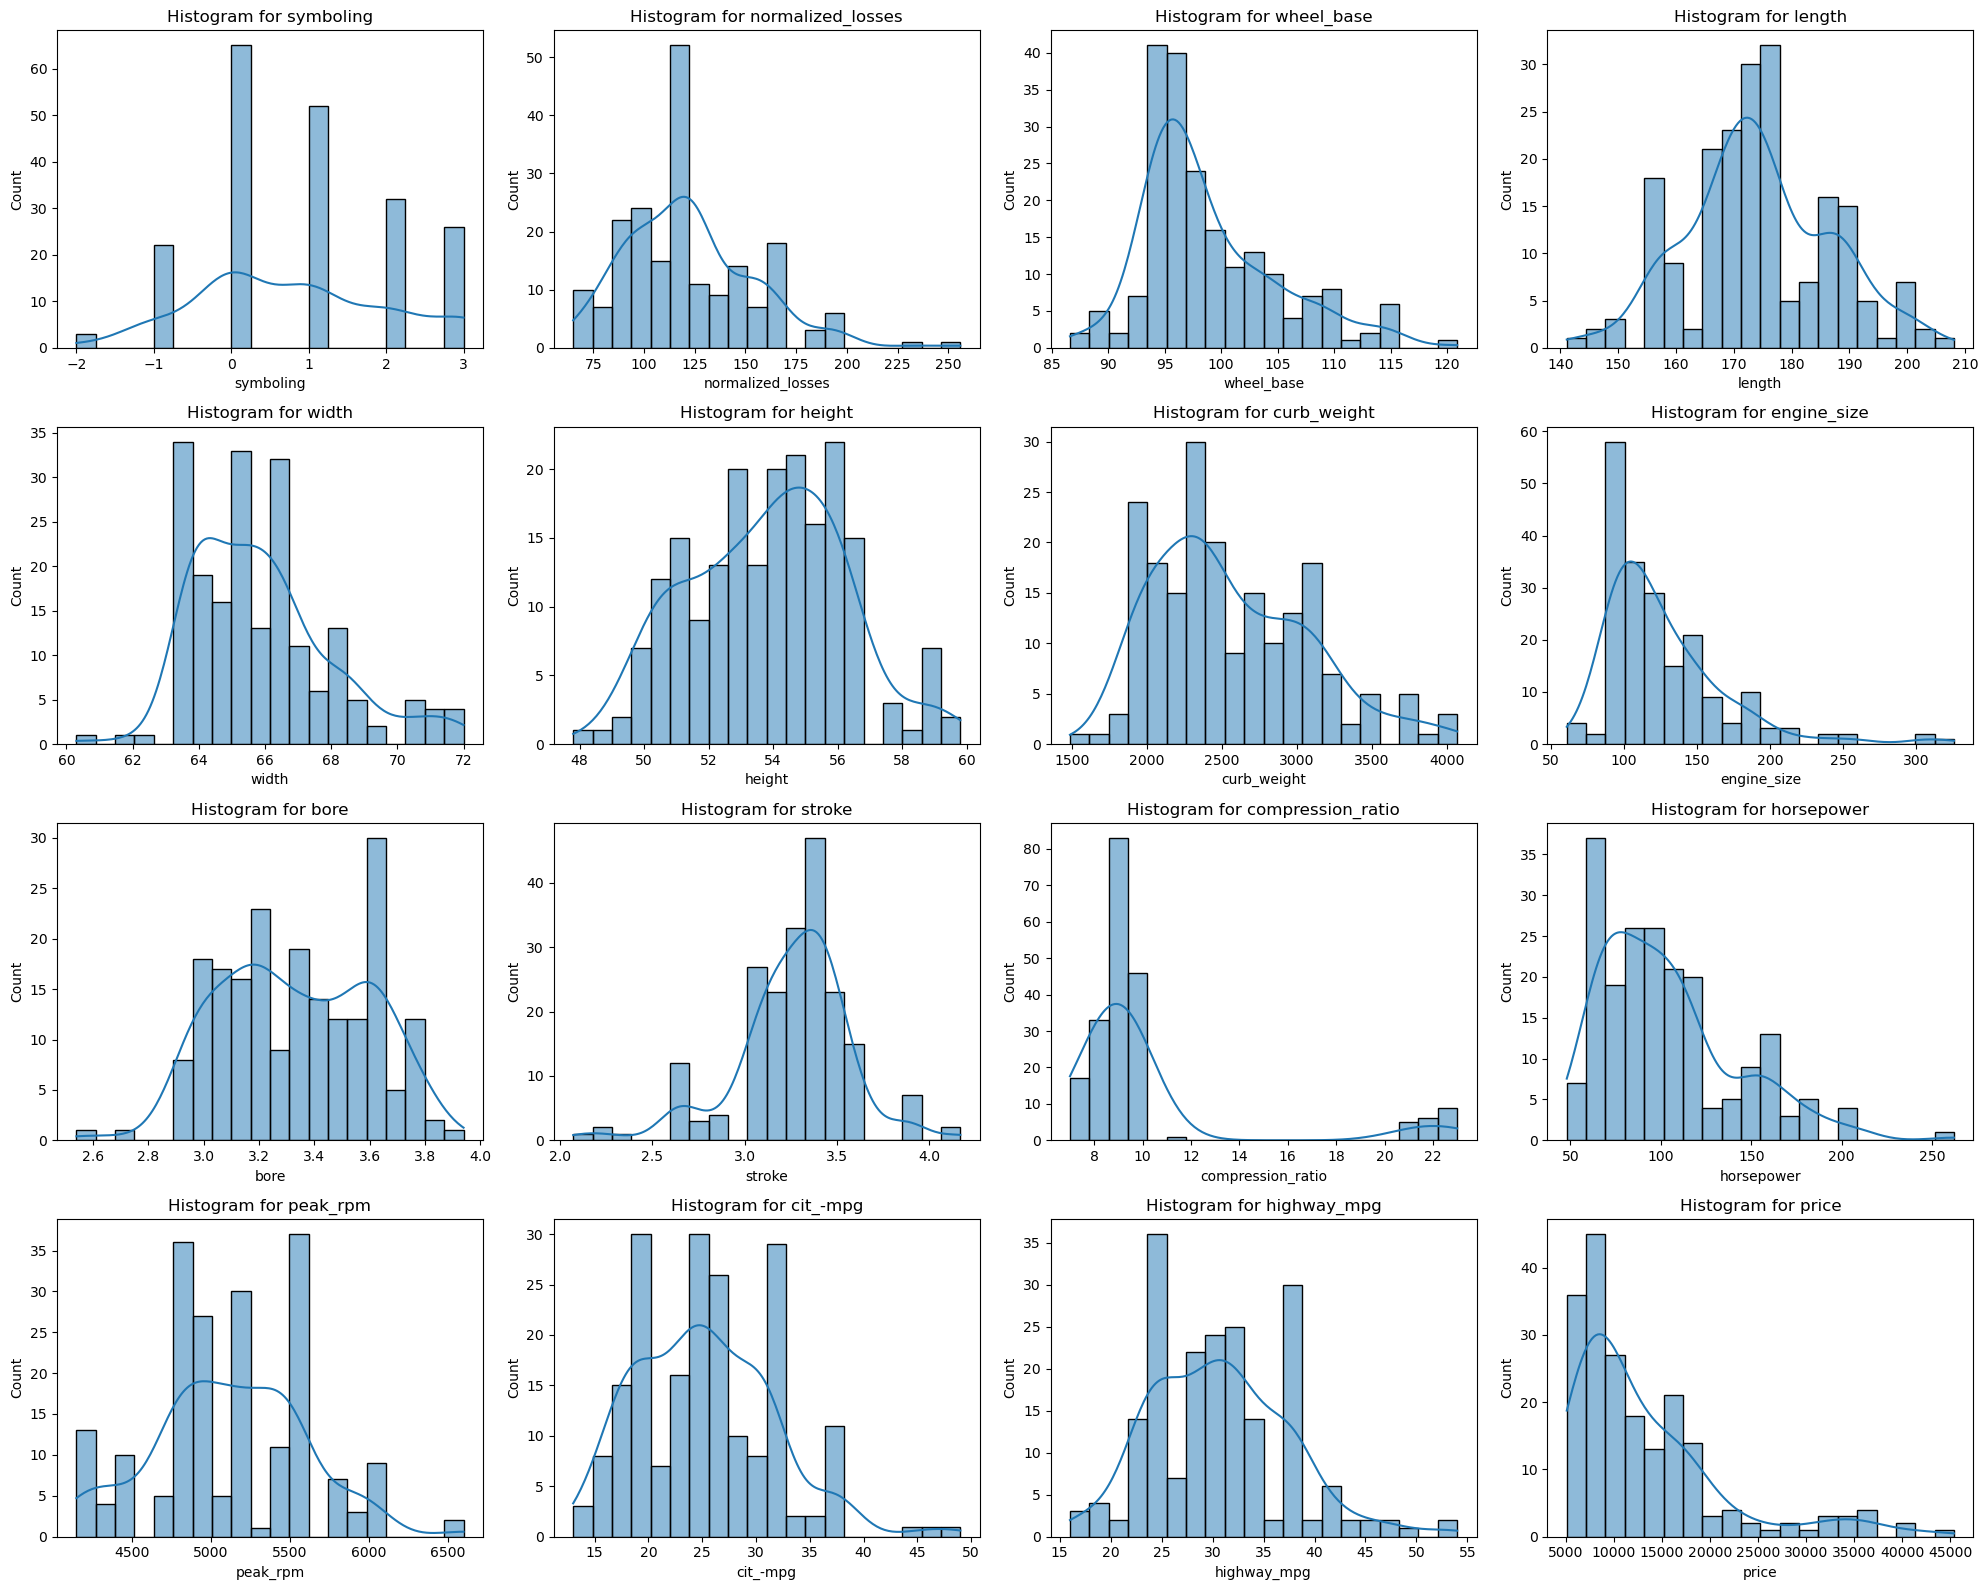

In [26]:
numerical_columns = df.select_dtypes(include=['number']).columns
n_cols = 4
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten() 

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Histogram for {column}")


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

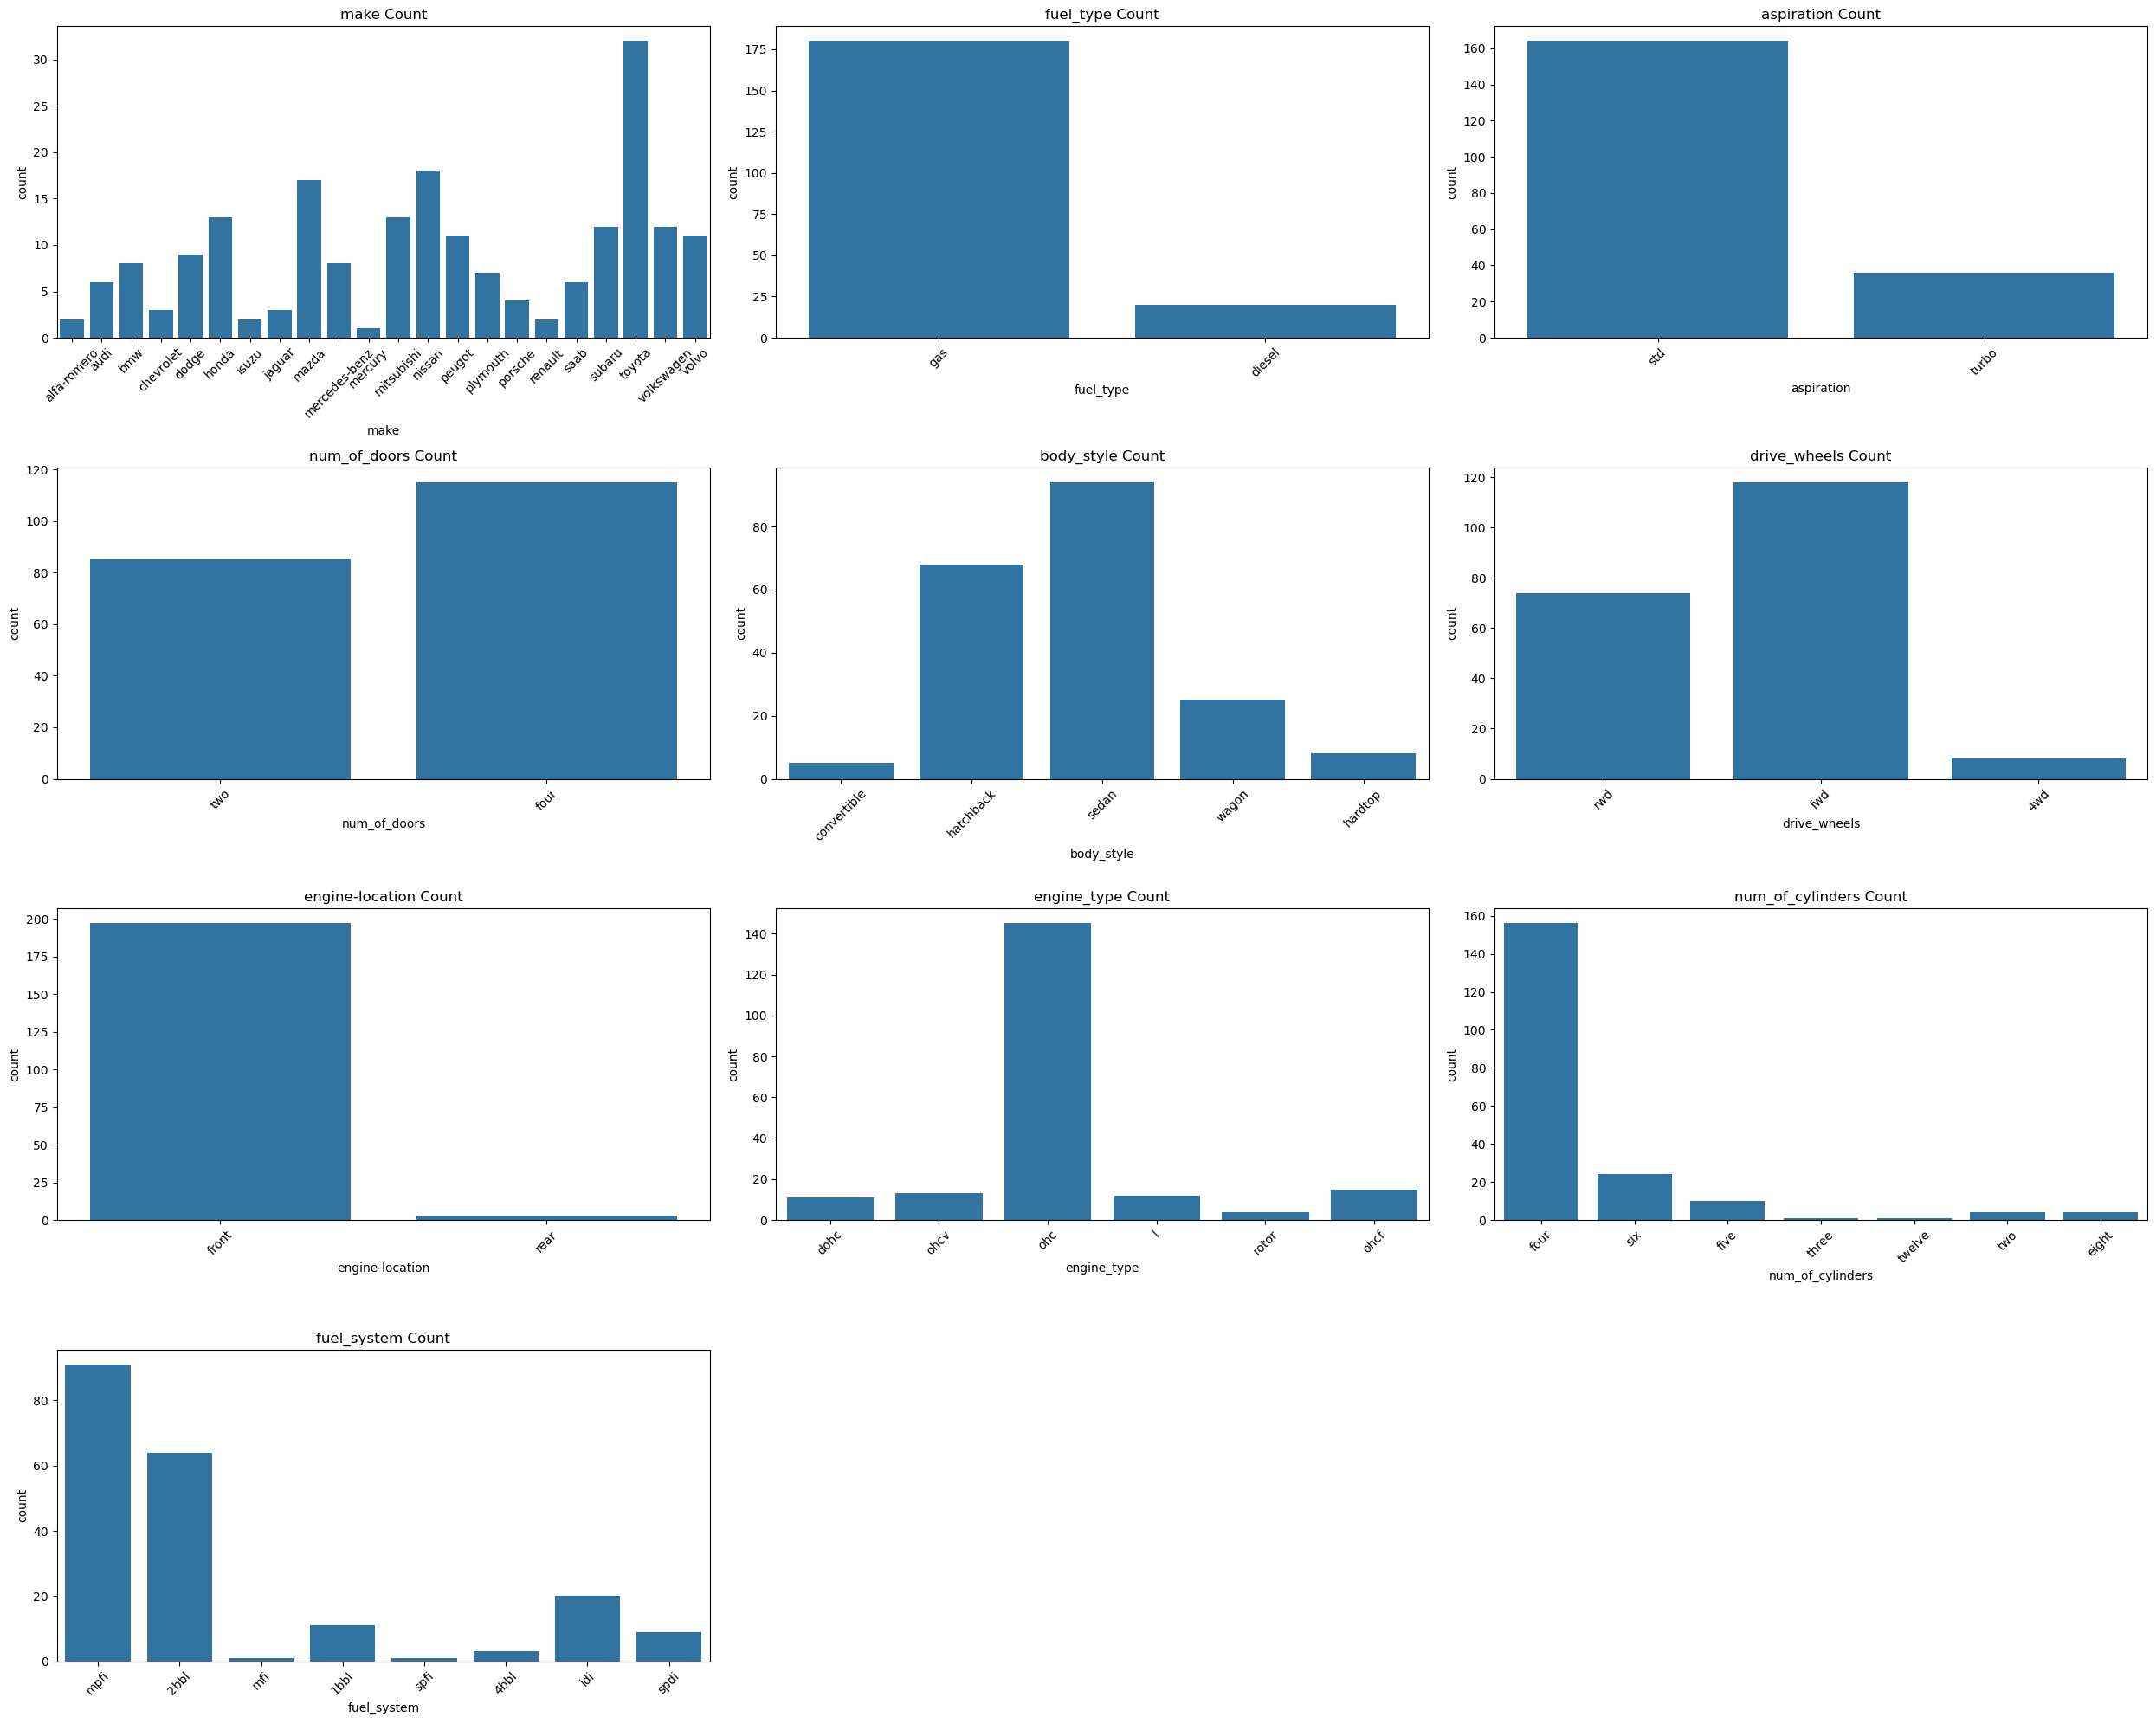

In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns

n_cols = 3
n_rows = int(np.ceil(len(categorical_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], ax=axes[i])
    axes[i].set_title(f"{column} Count")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Bivariant Analysis

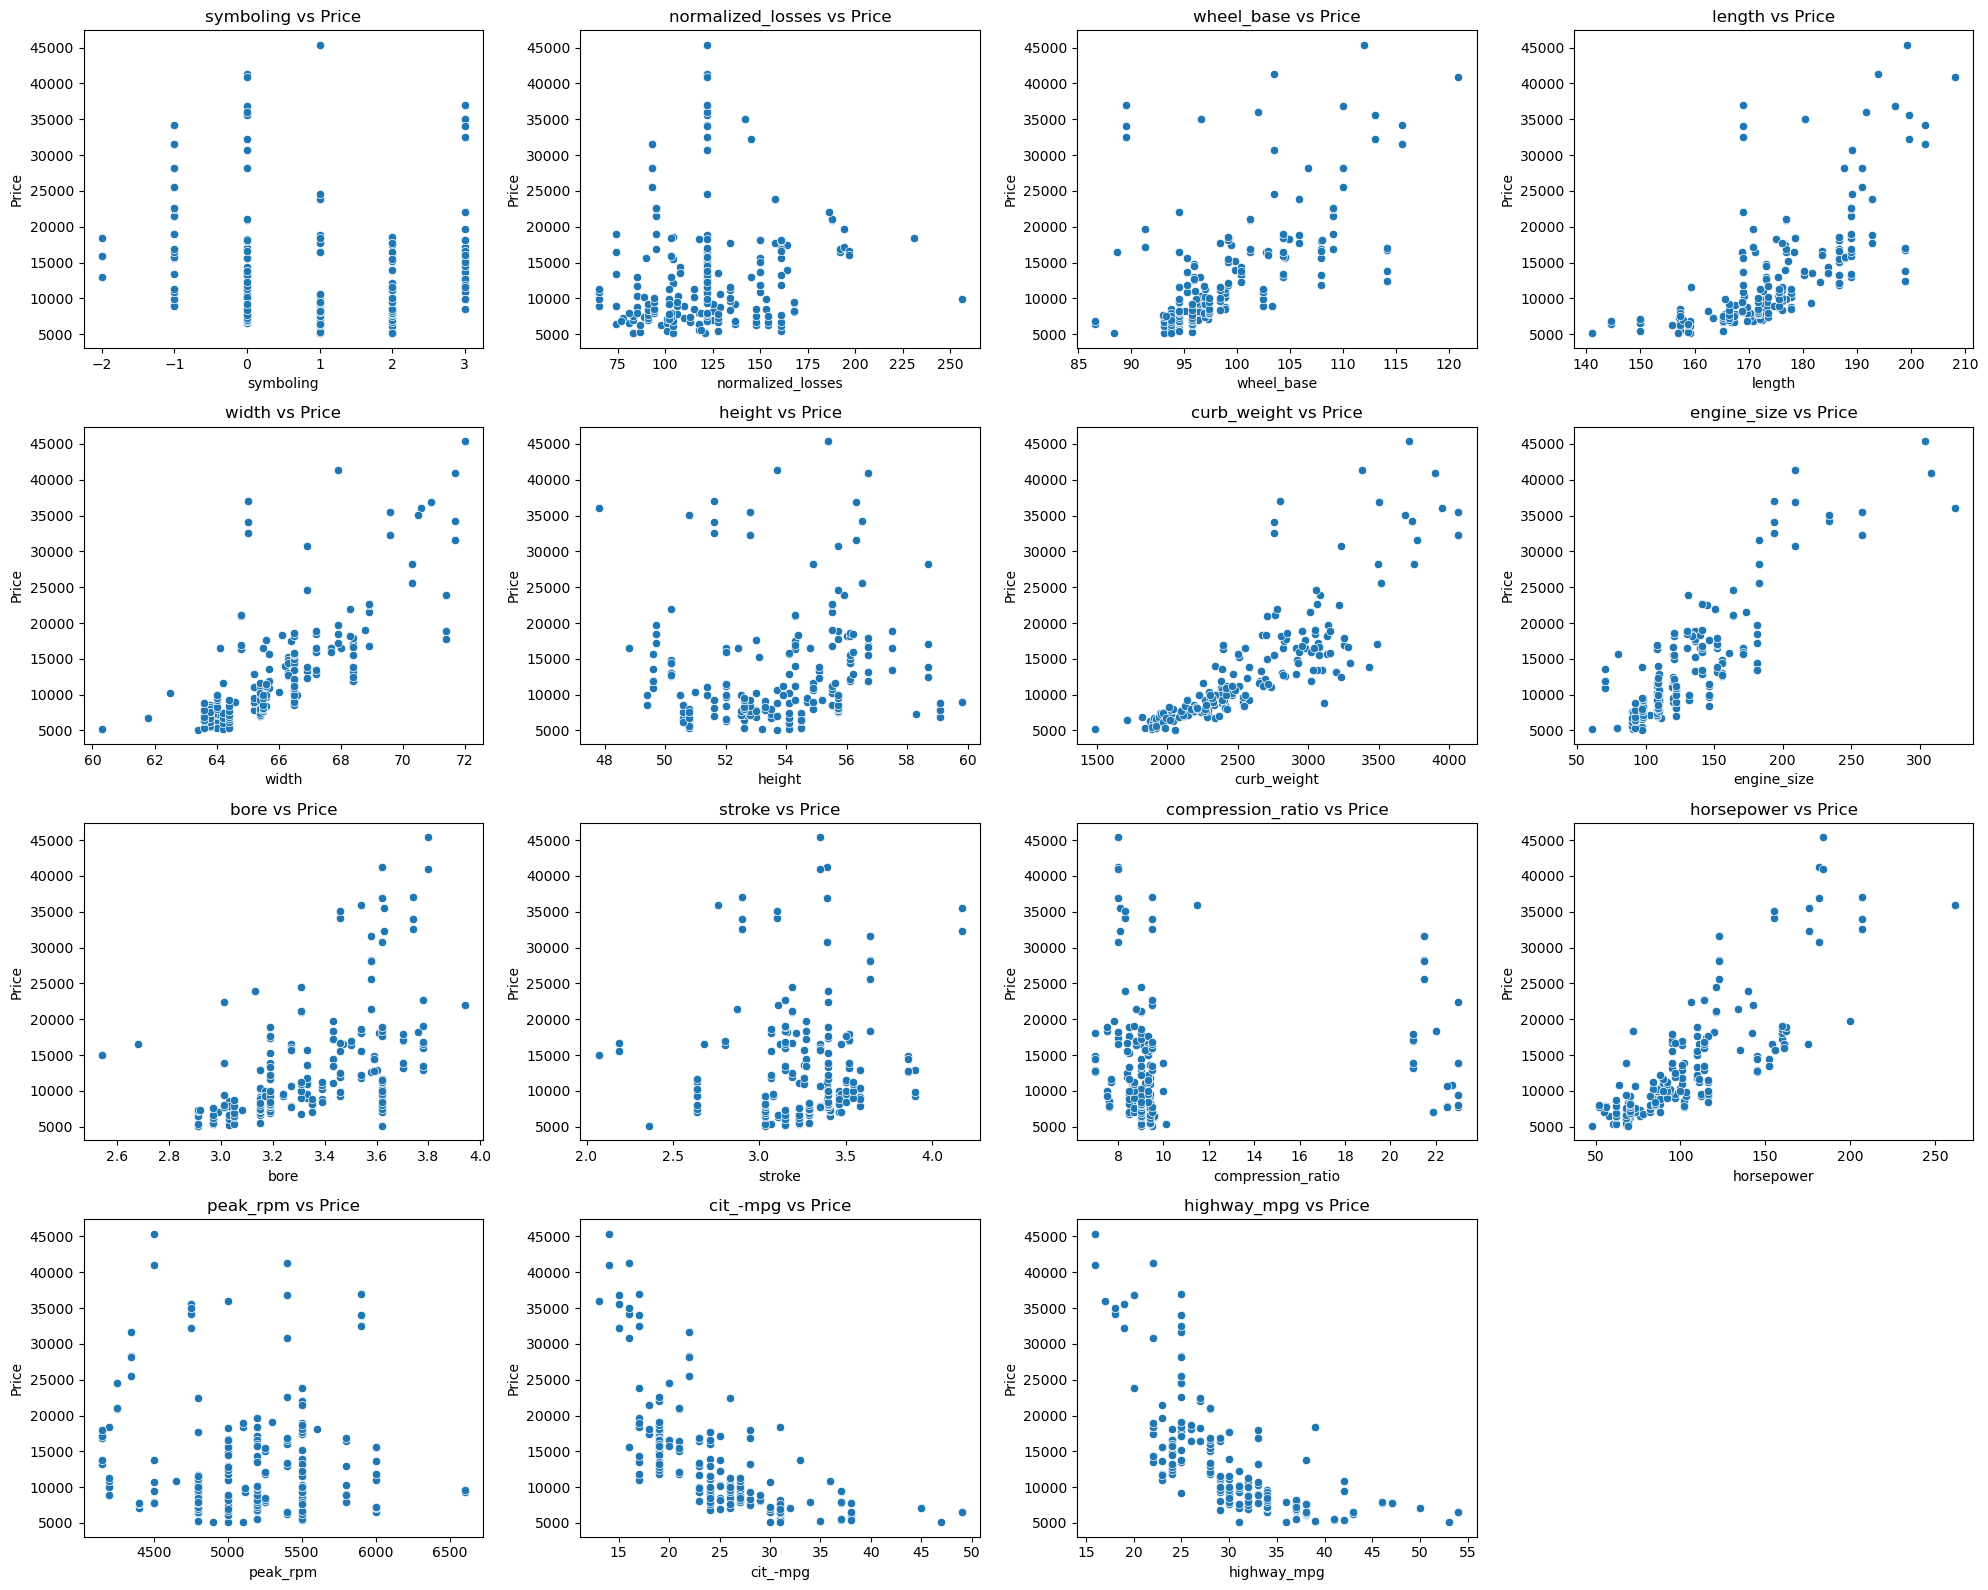

In [28]:
numerical_columns = df.select_dtypes(include=['number']).columns
features = [col for col in numerical_columns if col != 'price']

n_cols = 4
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(features):
    sns.scatterplot(x=df[column], y=df['price'], ax=axes[i])
    axes[i].set_title(f"{column} vs Price")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Price')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

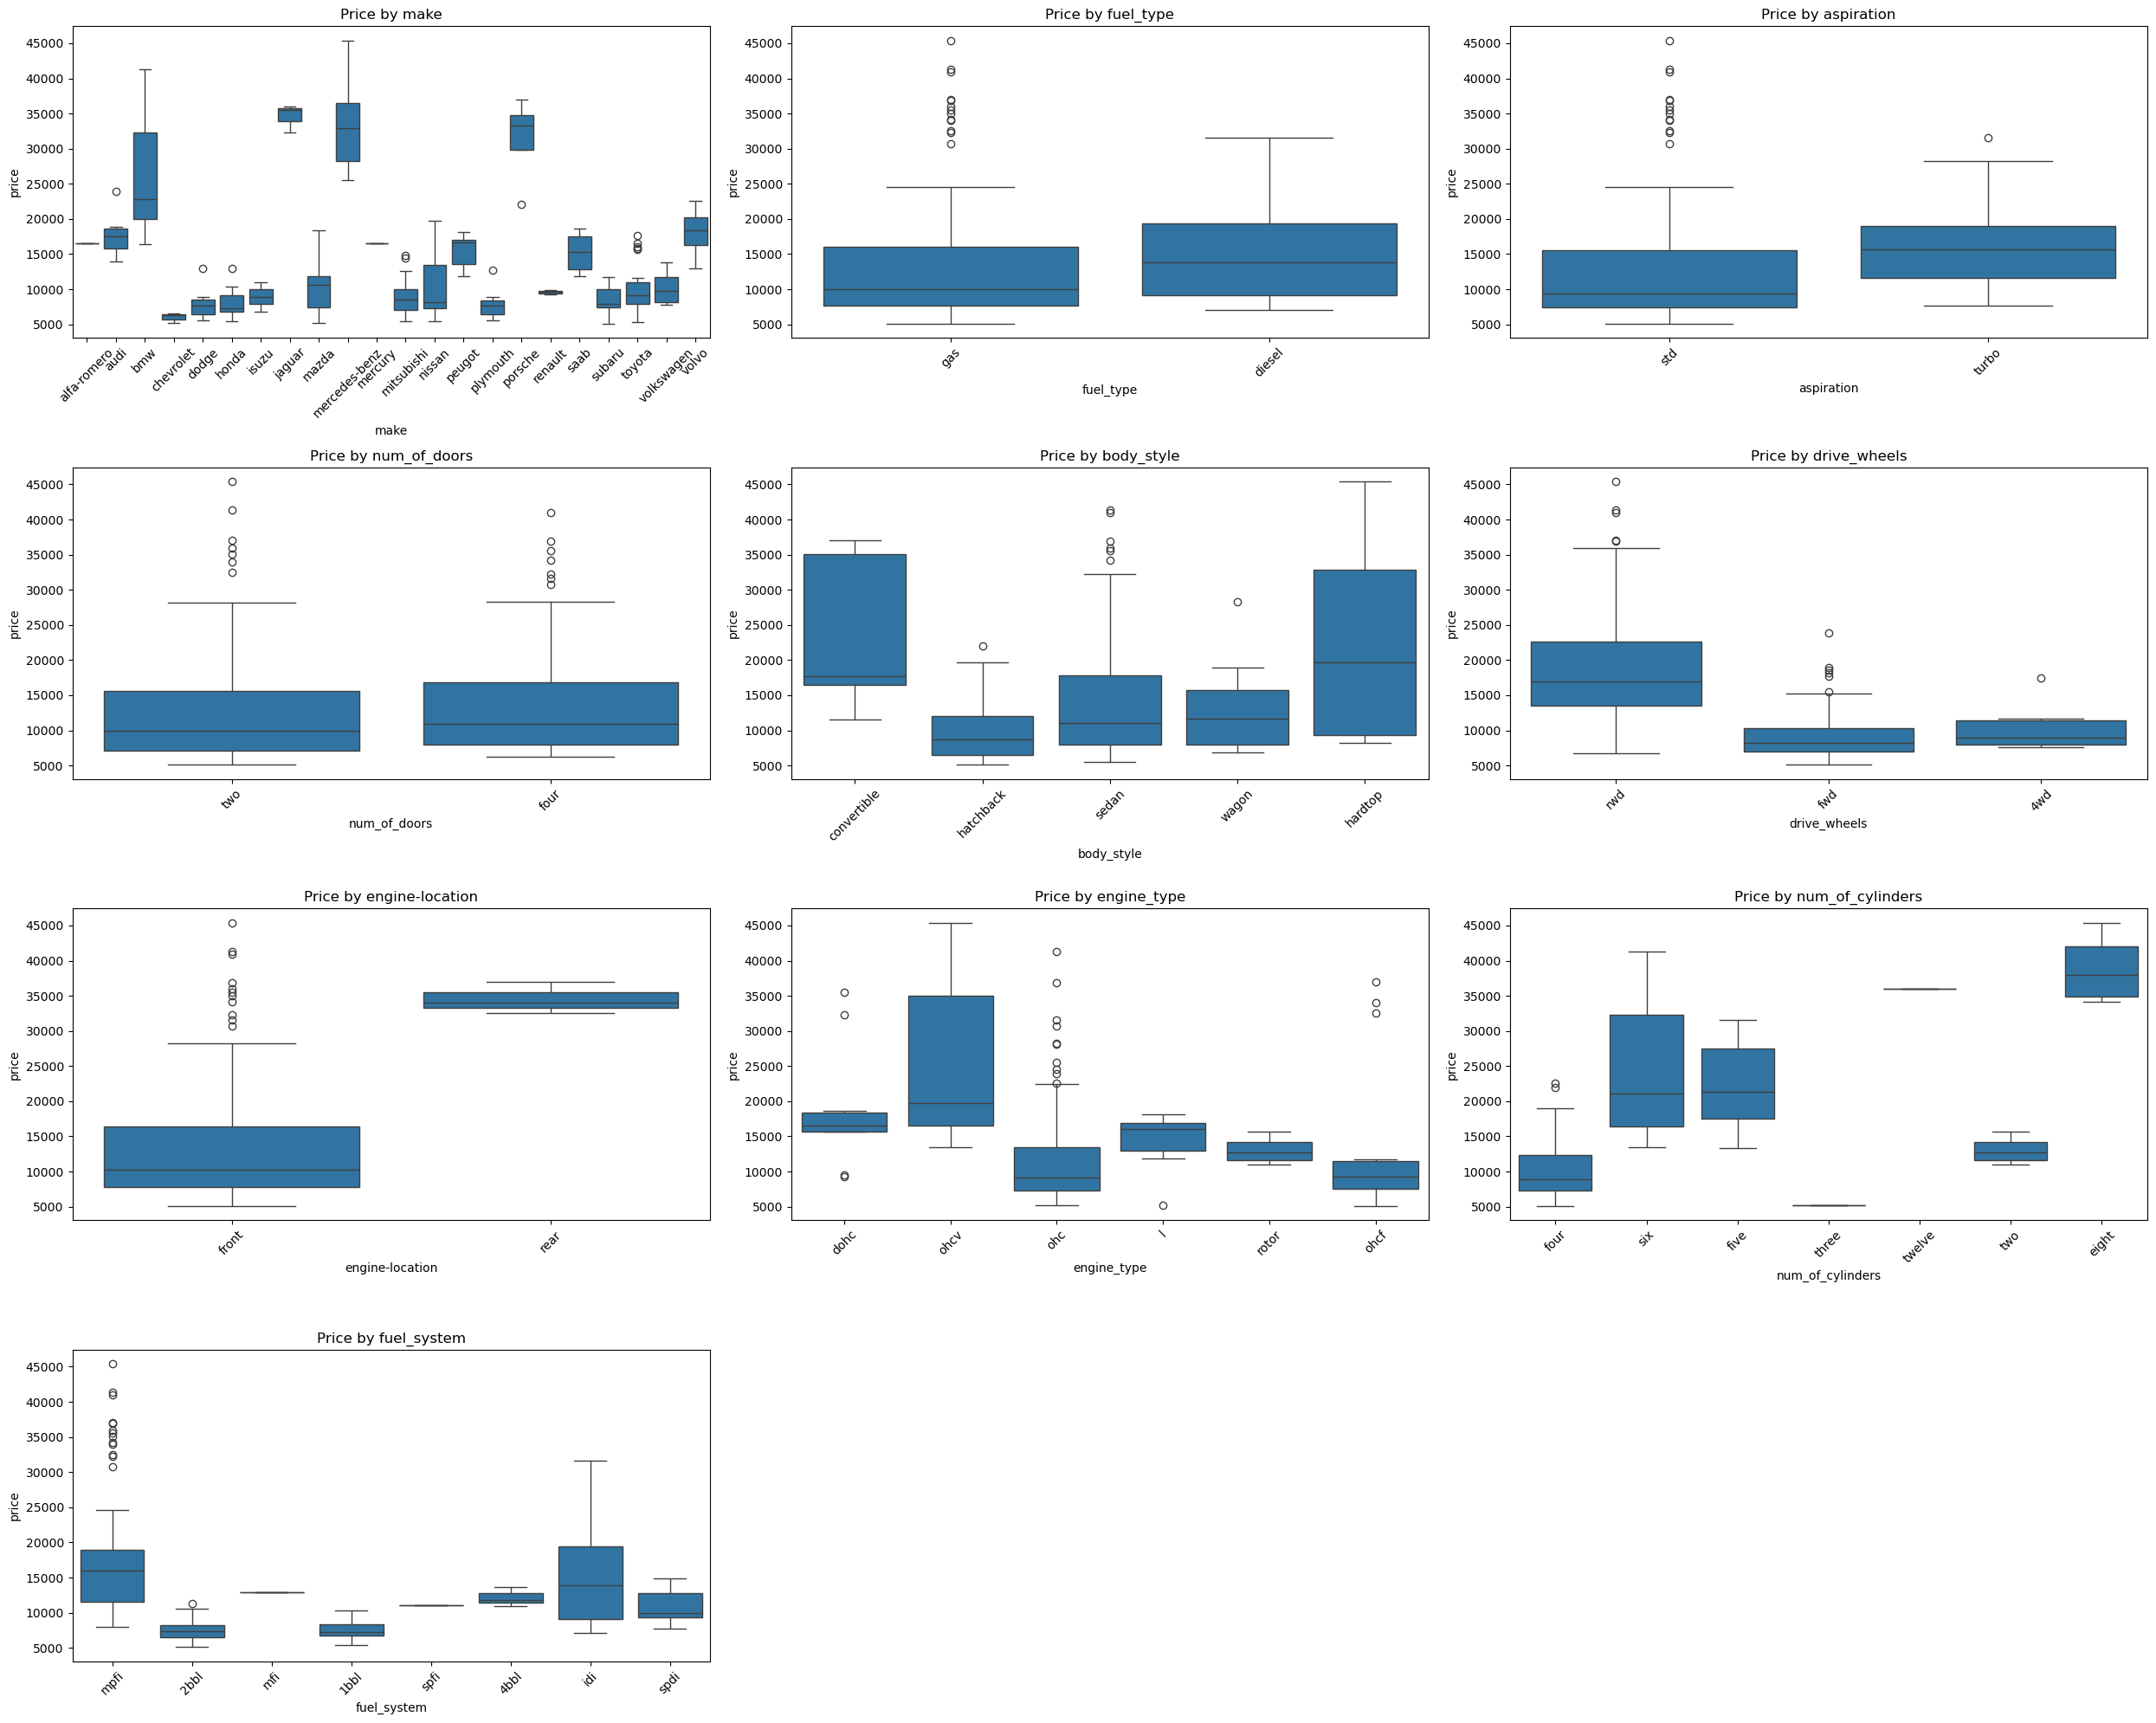

In [29]:
categorical_columns = df.select_dtypes(include='object').columns

n_cols = 3
n_rows = int(np.ceil(len(categorical_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.boxplot(x=df[column], y=df['price'], ax=axes[i])
    axes[i].set_title(f"Price by {column}")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


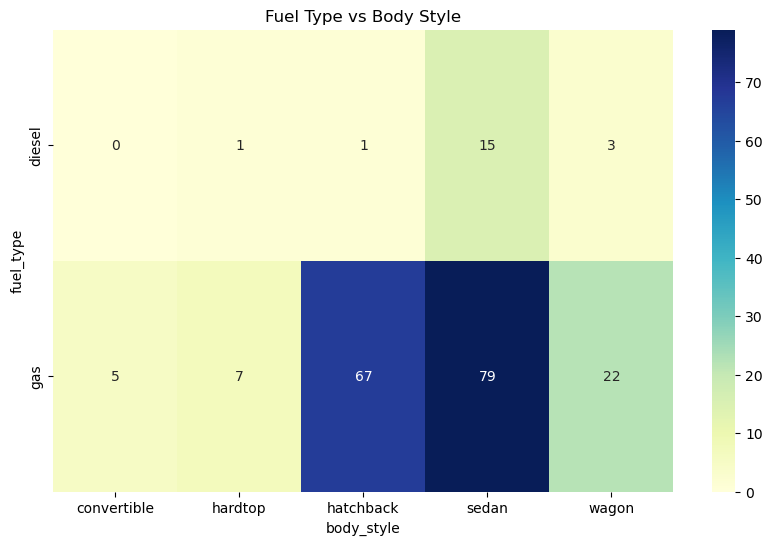

In [30]:
# Crosstab heatmap for two categorical variables
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(df['fuel_type'], df['body_style'])
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Fuel Type vs Body Style")
plt.show()


# Feature Engineering 
> Data Preprocesing

> Feature Selection

### Heatmap -correlation betwwen two variable

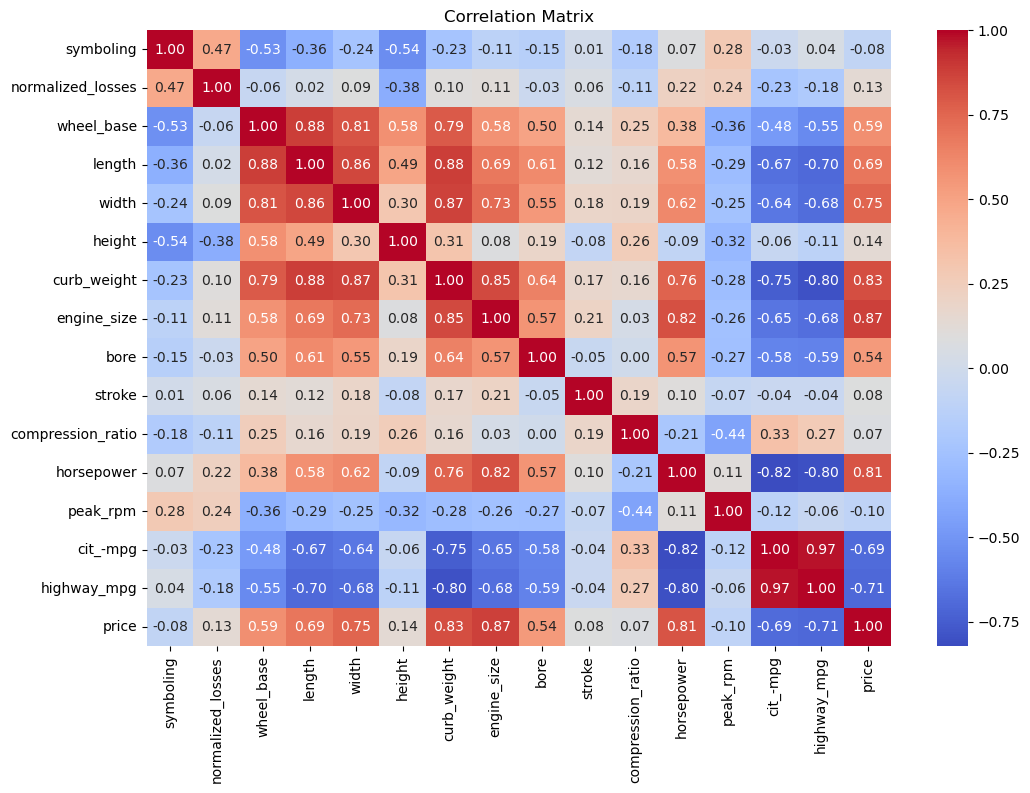

In [31]:
numerical_df = df.select_dtypes(include='number')

corre_matric = numerical_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corre_matric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

##  Feature Selection
>__wheel_base__
>
>__length__
>
>__width__
>
>__curb_weight__
>
>__engine_size__
>
>__bore__
>
>__horespower__


In [32]:
df["price"]

0      16500
1      16500
2      13950
3      17450
4      15250
       ...  
195    16845
196    19045
197    21485
198    22470
199    22625
Name: price, Length: 200, dtype: int64

In [33]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine-location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'cit_-mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [34]:
df = df[["wheel_base", "length", "width", "curb_weight", "engine_size", "bore", "horsepower", "price"]]
df

,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,price
0,88.6,168.8,64.1,2548,130,3.47,111.0,16500
1,94.5,171.2,65.5,2823,152,2.68,154.0,16500
2,99.8,176.6,66.2,2337,109,3.19,102.0,13950
3,99.4,176.6,66.4,2824,136,3.19,115.0,17450
4,99.8,177.3,66.3,2507,136,3.19,110.0,15250
...,...,...,...,...,...,...,...,...
195,109.1,188.8,68.9,2952,141,3.78,114.0,16845
196,109.1,188.8,68.8,3049,141,3.78,160.0,19045
197,109.1,188.8,68.9,3012,173,3.58,134.0,21485
198,109.1,188.8,68.9,3217,145,3.01,106.0,22470


In [35]:
df.columns

Index(['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore',
       'horsepower', 'price'],
      dtype='object')

# Define the X and Y

In [36]:
X = df[["wheel_base", "length", "width", "curb_weight", "engine_size", "bore", "horsepower"]]
y = df["price"]

In [37]:
X

,wheel_base,length,width,curb_weight,engine_size,bore,horsepower
0,88.6,168.8,64.1,2548,130,3.47,111.0
1,94.5,171.2,65.5,2823,152,2.68,154.0
2,99.8,176.6,66.2,2337,109,3.19,102.0
3,99.4,176.6,66.4,2824,136,3.19,115.0
4,99.8,177.3,66.3,2507,136,3.19,110.0
...,...,...,...,...,...,...,...
195,109.1,188.8,68.9,2952,141,3.78,114.0
196,109.1,188.8,68.8,3049,141,3.78,160.0
197,109.1,188.8,68.9,3012,173,3.58,134.0
198,109.1,188.8,68.9,3217,145,3.01,106.0


In [38]:
y

0      16500
1      16500
2      13950
3      17450
4      15250
       ...  
195    16845
196    19045
197    21485
198    22470
199    22625
Name: price, Length: 200, dtype: int64

# Split the train and test dataset

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [40]:
X_train

,wheel_base,length,width,curb_weight,engine_size,bore,horsepower
82,96.3,172.4,65.4,2405,122,3.35,88.0
101,91.3,170.7,67.9,3139,181,3.43,200.0
47,93.1,159.1,64.2,1900,91,3.03,68.0
27,95.9,173.2,66.3,2811,156,3.60,145.0
44,113.0,199.6,69.6,4066,258,3.63,176.0
...,...,...,...,...,...,...,...
57,98.8,177.8,66.5,2385,122,3.39,84.0
146,95.7,158.7,63.6,2040,92,3.05,62.0
66,115.6,202.6,71.7,3770,183,3.58,123.0
135,93.3,157.3,63.8,2240,108,3.62,73.0


In [41]:
X_test

,wheel_base,length,width,curb_weight,engine_size,bore,horsepower
15,110.0,197.0,70.9,3505,209,3.62,182.000000
171,102.4,175.6,66.5,2414,122,3.31,92.000000
103,107.9,186.7,68.4,3020,120,3.46,97.000000
119,103.3,174.6,64.6,2535,122,3.35,88.000000
116,93.7,157.3,63.8,1967,90,2.97,68.000000
162,98.4,176.2,65.6,2540,146,3.62,116.000000
54,95.3,169.0,65.7,2500,80,3.33,135.000000
17,94.5,155.9,63.6,1874,90,3.03,70.000000
117,93.7,167.3,63.8,1989,90,2.97,68.000000
100,91.3,170.7,67.9,3071,181,3.43,160.000000


In [42]:
y_train

82      8189
101    19699
47      6095
27     12964
44     35550
       ...  
57     10595
146     6338
66     31600
135     7603
20      6377
Name: price, Length: 160, dtype: int64

In [43]:
y_test

15     36880
171    10898
103    11900
119     8921
116     6229
162     8449
54     15645
17      6295
117     6692
100    17199
109    16695
8      16430
118     7609
38     10295
29      6855
149     7898
81      6989
126     9895
189    12940
85      5499
197    21485
152     7198
50      7395
62     18344
92      7499
34      7295
153     7898
14     41315
91      7799
173    16558
199    22625
177     7775
141     7463
125     9295
89      7349
75      7689
71     16503
195    16845
182     9495
112    17950
Name: price, dtype: int64

In [44]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [45]:
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
predlr = lr.predict(X_test)

In [47]:
predlr

array([29310.91218257, 12257.78291644, 14846.34559788, 10724.26307511,
        6221.79788685, 14730.86184204, 11151.21002782,  6006.76474722,
        5456.91559212, 23833.74321352, 14578.30173827,  9828.96175353,
        6635.29295895,  7199.36757431,  7434.81176525,  5717.49833965,
       11020.9006444 , 13584.9116667 , 15678.87822773,  5900.3166995 ,
       21342.7240819 ,  7090.68374403,  5769.95975385, 12564.86270151,
        6119.26233914,  7166.66304063,  7683.95039511, 26381.82344337,
        6246.74754515, 21934.02919801, 17724.10593172,  7098.73777626,
        9167.90050647, 13425.03896491,  5857.20031845,  9162.4070054 ,
       20494.83211953, 17430.39836634,  8133.83883127, 17796.98818463])

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse_lr = mean_squared_error(y_test,predlr)
print(f"Mean Squared Error: {mse_lr}")

Mean Squared Error: 15922626.749502152


In [49]:
mae_lr = mean_absolute_error(y_test,predlr)
print(f"Mean Squared Error: {mae_lr}")

Mean Squared Error: 2768.371273023495


# GridSearchCV on Decision_tree

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    "criterion":["mse","friedman_mse","mae"],
    "splitter" :["best","random"],
    "max_depth": [None,10,20,30,40,50],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]   
}


In [52]:
tree_model = DecisionTreeRegressor()

In [53]:
grid_tree = GridSearchCV(estimator= tree_model,param_grid=param_grid)

In [54]:
grid_tree.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [55]:
grid_tree.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=40)

In [56]:
tree_pred = grid_tree.predict(X_test)
tree_pred

array([33900.,  9988., 13415.,  8921.,  6229.,  9639.,  9279.,  6575.,
        7299., 19699., 13860., 16925.,  8558.,  6918.,  6575.,  6918.,
        9233., 15250., 15985.,  6649., 18280.,  8358.,  7295., 15985.,
        7299.,  6669.,  7788., 30760.,  6938., 15998., 16515.,  7995.,
        8495.,  9989.,  7999.,  9258., 18420., 15985.,  7995., 16900.])

In [57]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tree_pred)

1809.9

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2 = r2_score(y_test, tree_pred)

print(f"R² score: {r2}")

R² score: 0.8705557350768163


## RandomForestRegressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()

In [61]:
para_gridrf = {
    "max_depth":[5,10,15],
    "n_estimators":[2,3,4,5,6,7,8,9,10]
}

In [62]:
gridrf = GridSearchCV(rfmodel,para_gridrf)

In [63]:
gridrf.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [64]:
gridrf.best_params_

{'max_depth': 10, 'n_estimators': 4}

In [65]:
rfpredict = gridrf.predict(X_test)

In [66]:
rfpredict

array([32048.        , 10016.77777778, 16154.66666667,  9722.75      ,
        6229.        ,  9937.        , 11474.        ,  5948.25      ,
        7072.75      , 19353.5       , 17202.5       , 12765.25      ,
        7878.25      ,  8425.75      ,  6221.5       ,  7187.25      ,
        8585.5       , 13022.875     , 15390.32142857,  6649.        ,
       21460.        ,  8048.        ,  6593.5       , 13625.57142857,
        6974.        ,  7097.        ,  8292.5       , 33350.        ,
        7149.        , 16736.        , 20628.        ,  7986.75      ,
        8561.        , 11842.        ,  7374.        ,  7957.        ,
       18126.375     , 19216.75      ,  7991.25      , 16085.        ])

In [67]:
mean_absolute_error(y_test,rfpredict)

1627.6597222222222

In [68]:
mean_squared_error(y_test,rfpredict)

5475033.821690562

In [69]:
r2 = r2_score(y_test, tree_pred)

print(f"R² score: {r2}")

R² score: 0.8705557350768163


In [70]:
gridrf

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [73]:
import pickle
# open a file, where you ant to store the data
file = open('random_model_tree.pkl', 'wb')

# dump information to that file
pickle.dump(gridrf, file)

In [74]:
X.columns

Index(['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore',
       'horsepower'],
      dtype='object')